In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
 

# Dati scaricati dal sito

In [3]:
prop = pd.read_csv("GWTC-complete.csv")
display(prop)


,id,Name,version,GPS,reference,jsonurl,mass_1,mass_1_lw,mass_1_up,mass_2,...,chirp_mass_lw,chirp_mass_up,redshift,redshift_lw,redshift_up,far,p_astro,final_mass,final_mass_lw,final_mass_up
0,151008-v1,151008,1,1.128349e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-margina...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.17000,NaN,NaN,NaN,NaN
1,151012.2-v1,151012.2,1,1.128667e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-margina...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.56000,NaN,NaN,NaN,NaN
2,151116-v1,151116,1,1.131749e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-margina...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.77000,NaN,NaN,NaN,NaN
3,161202-v1,161202,1,1.164686e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-margina...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.00000,NaN,NaN,NaN,NaN
4,161217-v1,161217,1,1.165994e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-margina...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.12000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,GW200308_173609-v1,GW200308_173609,1,1.267724e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,36.4,-9.6,11.2,13.8,...,-2.80,4.80,0.83,-0.35,0.32,2.40000,0.85660,47.4,-7.7,11.1
177,GW200311_115853-v1,GW200311_115853,1,1.267963e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,34.2,-3.8,6.4,27.7,...,-2.00,2.40,0.23,-0.07,0.05,0.00001,0.99000,59.0,-3.9,4.8
178,GW200316_215756-v1,GW200316_215756,1,1.268431e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,13.1,-2.9,10.2,7.8,...,-0.55,0.62,0.22,-0.08,0.08,0.00001,0.99000,20.2,-1.9,7.4
179,GW200322_091133-v1,GW200322_091133,1,1.268904e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,34.0,-18.0,48.0,14.0,...,-3.70,15.70,0.60,-0.30,0.84,140.00000,0.61501,53.0,-26.0,38.0


In [4]:
mass = ["GW150914", "GW170729", "GW190521", "GW190924_021846", "GW190426_190642", "GW191109_010717", "GW191129_134029","GW200220_061928","GW200208_222617"]
spin = ["GW190514_065416", "GW190517_055101","GW190719_215514", "GW191109_010717","GW200208_222617","GW200308_173609","GW200208_222617"]
ratio = ["GW190814","GW190412","GW190403_051519", "GW191219_163120","GW200210_092254","GW190917_05151","GW19113_071753","GW200208_22617"]
Ns = ["GW170817", "GW190425"]
NSBH = ["GW191219_163120","GW200115_042309","GW200210_092254","GW190917_114630","GW190426_152155","GW200105_162426"]


In [5]:
prop.drop(columns=["id", "version", "GPS", "reference", "jsonurl", "far", "p_astro"], inplace=True)
prop

,Name,mass_1,mass_1_lw,mass_1_up,mass_2,mass_2_lw,mass_2_up,snr,snr_lw,snr_up,...,total_mass_up,chirp_mass,chirp_mass_lw,chirp_mass_up,redshift,redshift_lw,redshift_up,final_mass,final_mass_lw,final_mass_up
0,151008,NaN,NaN,NaN,NaN,NaN,NaN,8.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,151012.2,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,151116,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161202,NaN,NaN,NaN,NaN,NaN,NaN,10.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161217,NaN,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,GW200308_173609,36.4,-9.6,11.2,13.8,-3.3,7.2,7.1,-0.5,0.5,...,10.9,19.00,-2.80,4.80,0.83,-0.35,0.32,47.4,-7.7,11.1
177,GW200311_115853,34.2,-3.8,6.4,27.7,-5.9,4.1,17.8,-0.2,0.2,...,5.3,26.60,-2.00,2.40,0.23,-0.07,0.05,59.0,-3.9,4.8
178,GW200316_215756,13.1,-2.9,10.2,7.8,-2.9,1.9,10.3,-0.7,0.4,...,7.2,8.75,-0.55,0.62,0.22,-0.08,0.08,20.2,-1.9,7.4
179,GW200322_091133,34.0,-18.0,48.0,14.0,-8.7,16.8,6.0,-1.2,1.7,...,37.0,15.50,-3.70,15.70,0.60,-0.30,0.84,53.0,-26.0,38.0


In [6]:
q = []   #aggiungi una colonna al dataframe

for i in range (len(prop["mass_1"])):
    q.append(prop["mass_2"][i]/prop["mass_1"][i])



Text(0, 0.5, 'mass2')

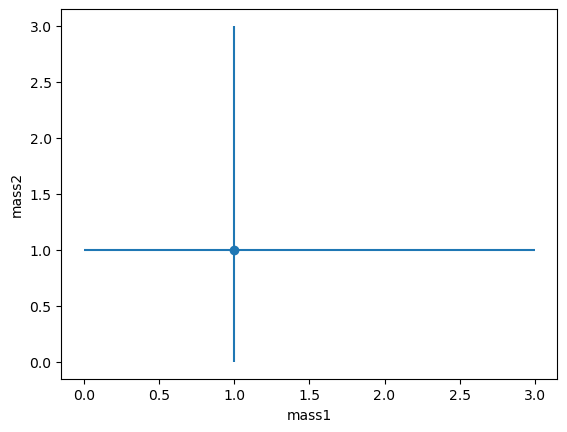

In [7]:
#test of asymmetric boundaries

plt.errorbar(1, 1, xerr= np.array([[1],[2]]), yerr=np.array([[1],[2]]), fmt="o")
plt.xlabel ('mass1')
plt.ylabel ('mass2')

## Histograms

35.001470588235314

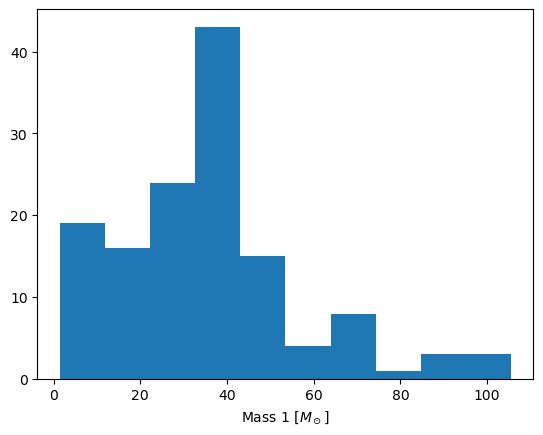

In [9]:
plt.hist(prop["mass_1"])
plt.xlabel("Mass 1 [$M_\odot$]")

mean = np.mean(prop["mass_1"])
max = np.max(prop["mass_1"])
min = np.min (prop["mass_1"])

print(mean, max, min)

Text(0.5, 0, 'Mass 2 [$M_\\odot$]')

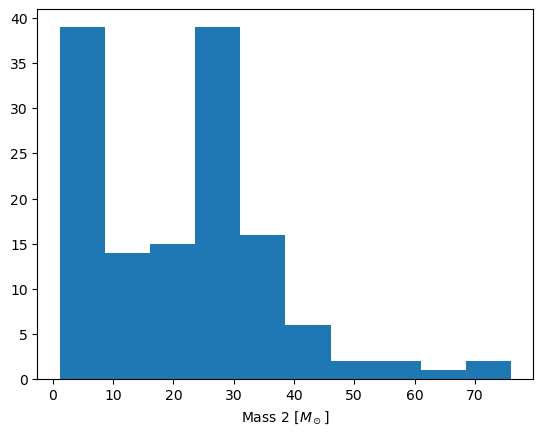

In [ ]:
plt.hist(prop["mass_2"])
plt.xlabel("Mass 2 [$M_\odot$]")

Text(0.5, 0, ' q = m2/m1')

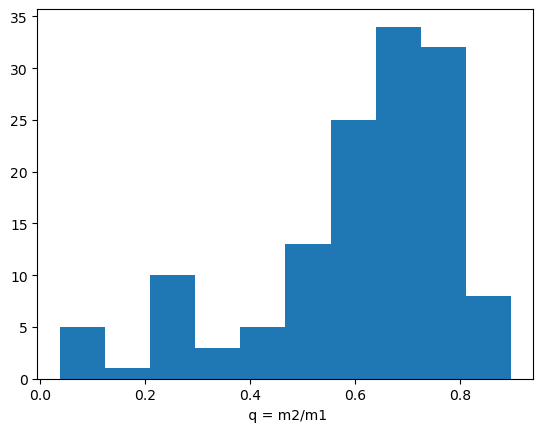

In [ ]:
plt.hist(prop["mass_2"]/prop["mass_1"])  
plt.xlabel(" q = m2/m1")

Text(0.5, 0, 'Total mass [$M_\\odot$]')

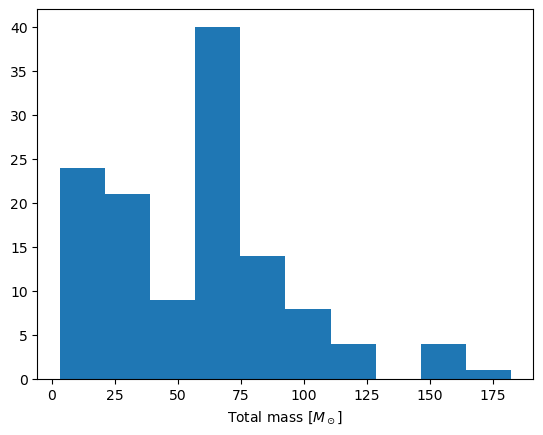

In [ ]:
plt.hist(prop["total_mass"])
plt.xlabel("Total mass [$M_\odot$]")

Text(0.5, 0, 'DL [Mpc]')

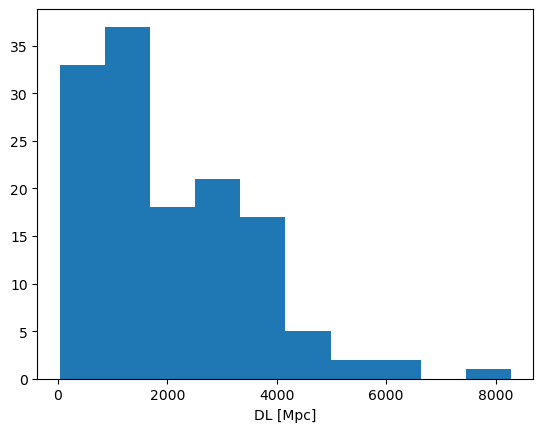

In [ ]:
plt.hist(prop["luminosity_distance"])
plt.xlabel("DL [Mpc]")

Text(0.5, 0, 'Chi eff')

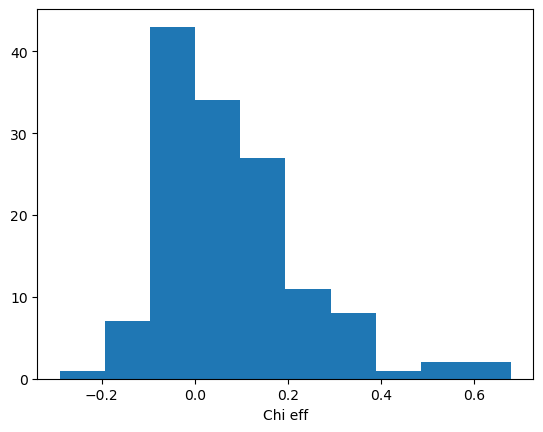

In [ ]:
plt.hist(prop["chi_eff"])
plt.xlabel("Chi eff")

Text(0.5, 0, 'Chirp Mass [$M_\\odot$]')

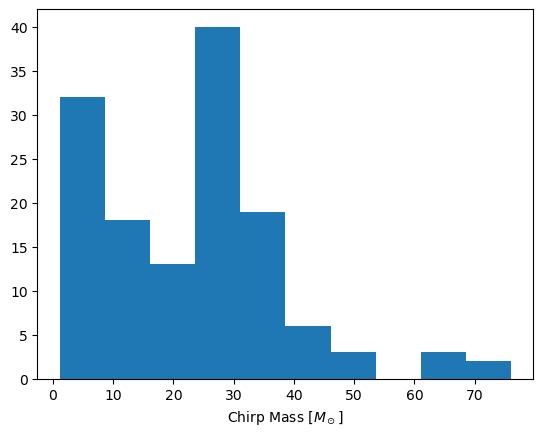

In [ ]:
plt.hist(prop["chirp_mass"])
plt.xlabel("Chirp Mass [$M_\odot$]")

Text(0.5, 0, 'z')

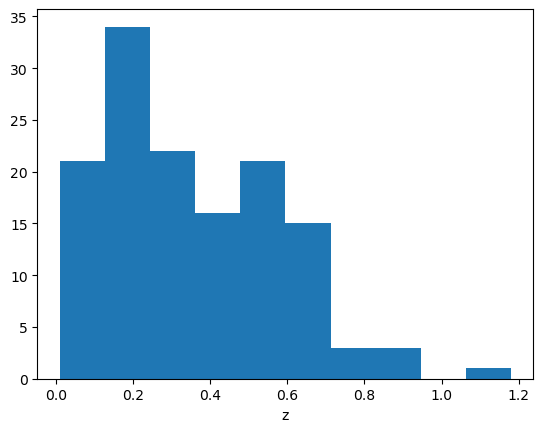

In [ ]:
plt.hist(prop["redshift"])
plt.xlabel("z")

Text(0.5, 0, 'Final mass [$M_\\odot$]')

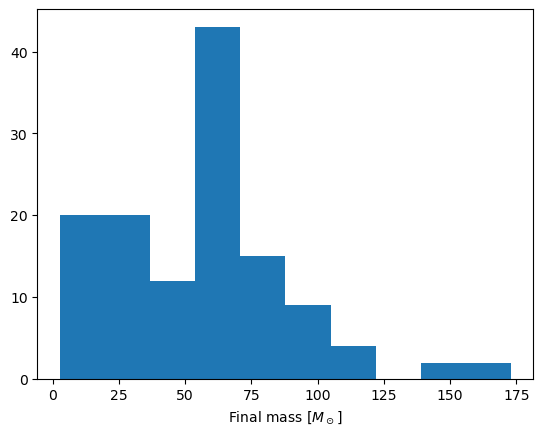

In [ ]:
plt.hist(prop["final_mass"])
plt.xlabel("Final mass [$M_\odot$]")

Text(0.5, 0, 'Signal to noise ratio')

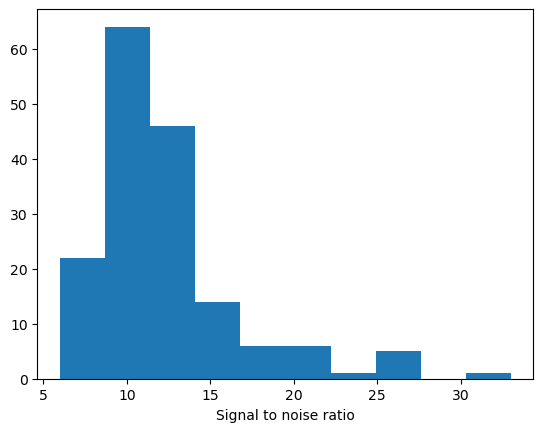

In [ ]:
plt.hist(prop["snr"])
plt.xlabel("Signal to noise ratio")

# Graphs

In [ ]:
def graph(a,b,erralw, erraup, errblw, errbup):
    df_mass = prop[prop['Name'].isin(mass)]
    df_spin = prop[prop['Name'].isin(spin)]
    df_ratio = prop[prop['Name'].isin(ratio)]
    df_ns = prop[prop['Name'].isin(Ns)]
    df_nsbh = prop[prop['Name'].isin(NSBH)]

    plt.errorbar(prop[a], prop[b], xerr= [abs(prop[erralw]),prop[erraup]], yerr= [abs(prop[errblw]),prop[errbup]], fmt="o", color = "b", label = "sources")
    plt.errorbar(df_mass[a], df_mass[b], xerr= [abs(df_mass[erralw]),df_mass[erraup]], yerr= [abs(df_mass[errblw]),df_mass[errbup]], fmt="o", color = "r", label = "sources with significant mass" )
    plt.errorbar(df_spin[a], df_spin[b], xerr= [abs(df_spin[erralw]),df_spin[erraup]], yerr= [abs(df_spin[errblw]),df_spin[errbup]], fmt="o", color = "m", label= "sources with significant spin" )
    plt.errorbar(df_ratio[a], df_ratio[b], xerr= [abs(df_ratio[erralw]),df_ratio[erraup]], yerr= [abs(df_ratio[errblw]),df_ratio[errbup]], fmt="o", color = "y", label = "sources with significant mass ratio")
    plt.errorbar(df_ns[a], df_ns[b], xerr= [abs(df_ns[erralw]),df_ns[erraup]], yerr= [abs(df_ns[errblw]),df_ns[errbup]],  fmt="o", color = "g", label= "neutron star systems" )
    plt.errorbar(df_nsbh[a], df_nsbh[b], xerr= [abs(df_nsbh[erralw]),df_nsbh[erraup]], yerr= [abs(df_nsbh[errblw]),df_nsbh[errbup]],  fmt="o", color = "k", label= "neutron star black holes systems" )
    plt.legend(fontsize = 8)   


## Mass 1 vs Mass 2

Text(0, 0.5, 'mass2 [$M_\\odot$]')

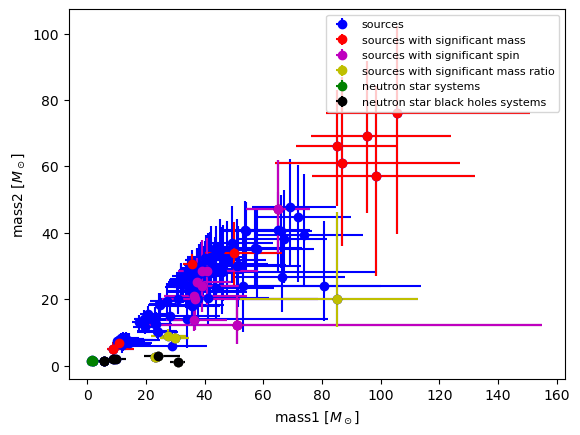

In [ ]:
graph("mass_1", "mass_2", "mass_1_lw", "mass_1_up", "mass_2_lw", "mass_2_up")
 
plt.xlabel ('mass1 [$M_\odot$]')
plt.ylabel ('mass2 [$M_\odot$]')

### Mass 1 vs total Mass

Text(0, 0.5, 'total mass [$M_\\odot$]')

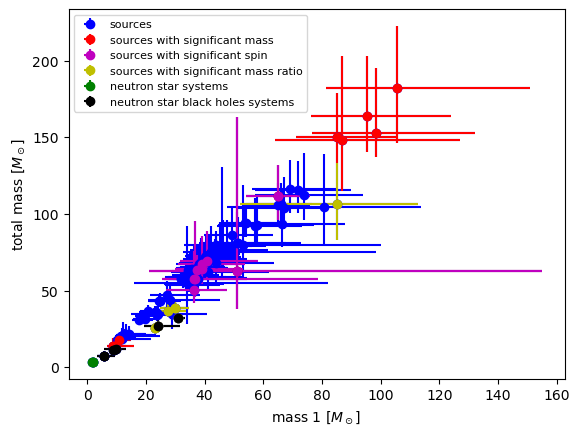

In [ ]:
graph("mass_1", "total_mass", "mass_1_lw", "mass_1_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('mass 1 [$M_\odot$]')
plt.ylabel ('total mass [$M_\odot$]')


### Mass 2 vs Total mass

Text(0, 0.5, 'total mass [$M_\\odot$]')

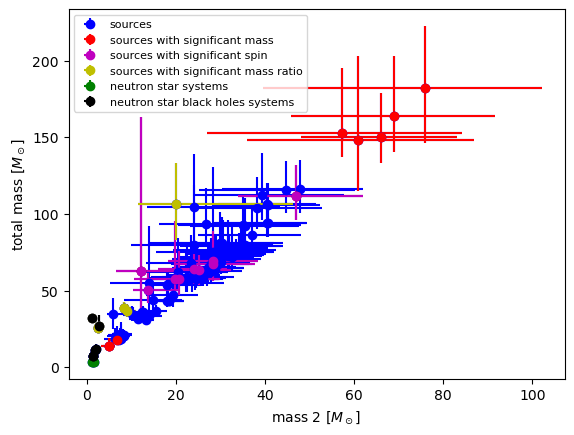

In [ ]:
graph("mass_2", "total_mass", "mass_2_lw", "mass_2_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('mass 2 [$M_\odot$]')
plt.ylabel ('total mass [$M_\odot$]')

### Total mass vs Distance

Text(0, 0.5, 'Dl [Mpc]')

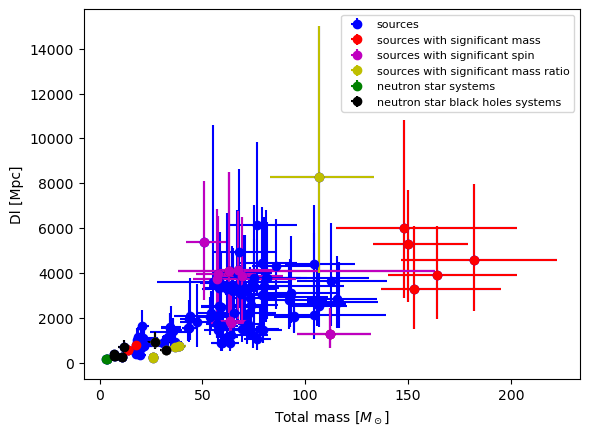

In [ ]:
graph( "total_mass", "luminosity_distance", "total_mass_lw", "total_mass_up","luminosity_distance_lw", "luminosity_distance_up")

plt.xlabel ('Total mass [$M_\odot$]')
plt.ylabel ('Dl [Mpc]')

### Mass 1 vs Distance

Text(0, 0.5, 'Dl [Mpc]')

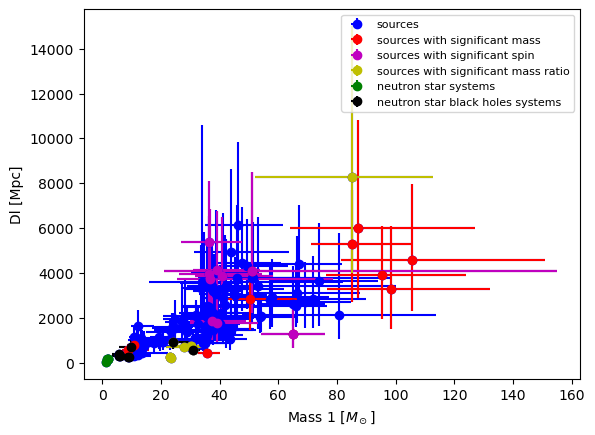

In [ ]:
graph("mass_1","luminosity_distance", "mass_1_lw", "mass_1_up", "luminosity_distance_lw", "luminosity_distance_up")
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('Dl [Mpc]')

### Dl vs z

Text(0, 0.5, 'z')

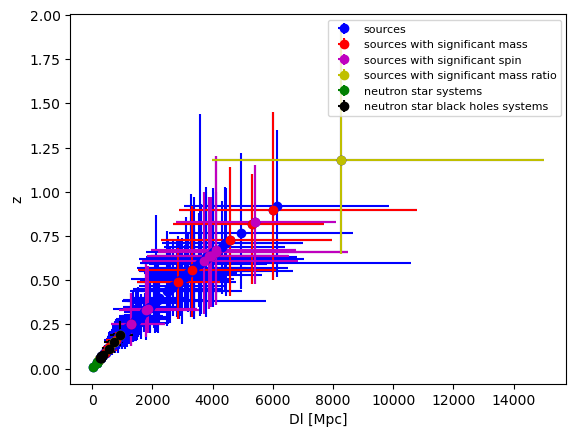

In [ ]:
graph("luminosity_distance", "redshift", "luminosity_distance_lw", "luminosity_distance_up", "redshift_lw", "redshift_up")

plt.xlabel ('Dl [Mpc]')
plt.ylabel ('z')   #look for luminosity distance and z relation


## Mass ratio

In [ ]:
meanerrm1= abs(prop["mass_1_lw"]-prop["mass_1_up"])/2
meanerrm2= abs(prop["mass_2_lw"]-prop["mass_2_up"])/2


In [ ]:
errq= np.empty(len(q))
for i in range (len(q)):
    errq[i]= math.sqrt((prop["mass_2"][i]/prop["mass_1"][i]**2)**2*meanerrm1[i]**2+(1/prop["mass_1"][i])**2*meanerrm2[i]**2)

In [ ]:
prop.insert(28, "ratio",q)
prop.insert(29, "ratio_err", errq)



C:\Users\sarev\AppData\Local\Temp\ipykernel_16760\4140967454.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1))


Text(0, 0.5, 'ratio')

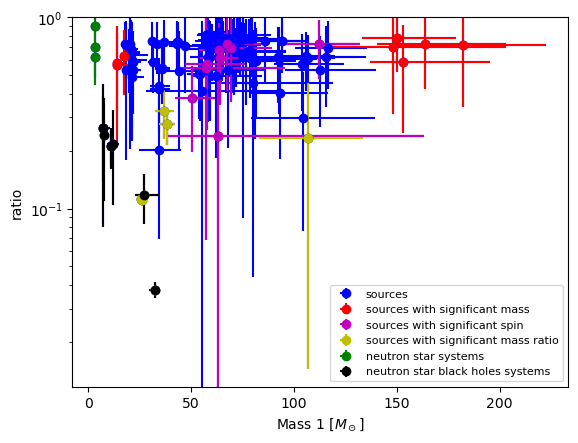

In [ ]:
graph("total_mass", "ratio", "total_mass_lw", "total_mass_up", "ratio_err", "ratio_err")
#graph(totm, q, totm_err, totm_err )
plt.yscale("log")
plt.ylim((0,1))

plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('ratio')


In [ ]:
np.max(q)

nan

### Chrip mass vs Total mass

In [ ]:
def chirp_mass(q,M):
    return ( np.ones(len(M))*(q/(1+q)**2)**(3./5.)*M)

M = np.linspace(0,200)

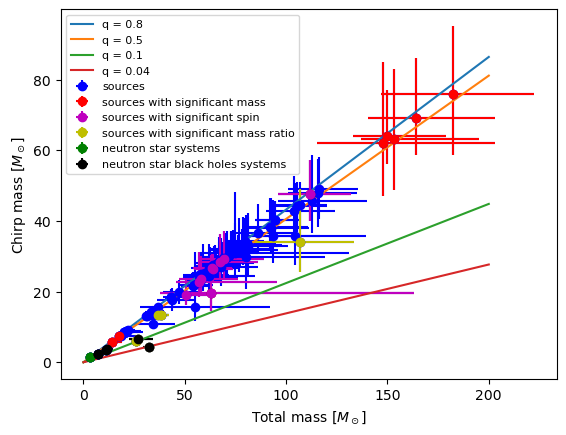

In [ ]:
graph("total_mass", "chirp_mass", "total_mass_lw", "total_mass_up", "chirp_mass_lw", "chirp_mass_up")

plt.xlabel ('Total mass [$M_\odot$]')
plt.ylabel ('Chirp mass [$M_\odot$]')

chirp_mass1 = chirp_mass(0.8,M)
chirp_mass2 = chirp_mass(0.5,M)
chirp_mass3 = chirp_mass(0.1,M) 
chirp_mass4 = chirp_mass(0.04,M) 

plt.plot(M, chirp_mass1, label= "q = 0.8")
plt.plot(M, chirp_mass2, label= "q = 0.5")
plt.plot(M, chirp_mass3, label= "q = 0.1")
plt.plot(M, chirp_mass4, label= "q = 0.04")
plt.legend(fontsize= 8 )


### Mass 1 vs Chirp mass

Text(0, 0.5, 'chirp [$M_\\odot$]')

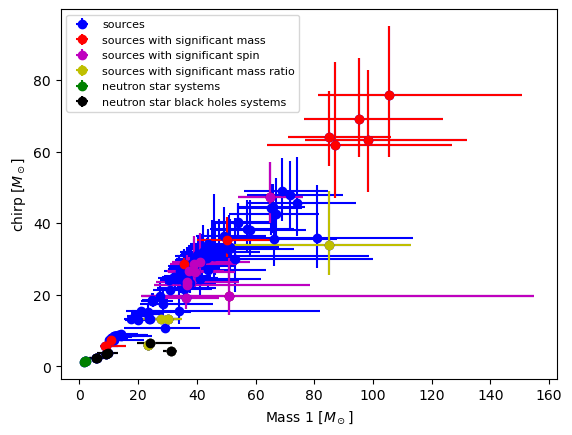

In [ ]:
graph("mass_1", "chirp_mass", "mass_1_lw", "mass_1_up", "chirp_mass_lw", "chirp_mass_up")
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('chirp [$M_\odot$]')

### Chirp mass vs distance

Text(0, 0.5, 'Distance [Mpc]')

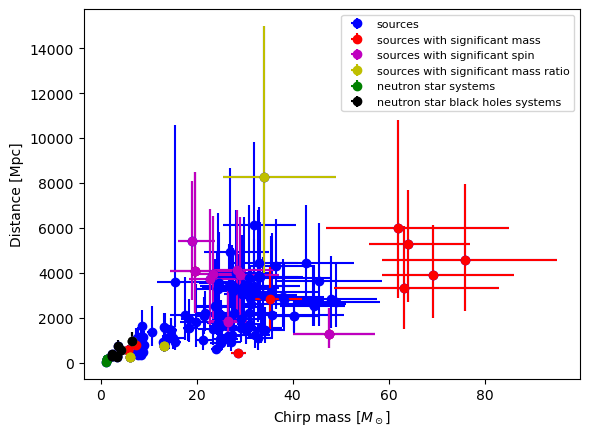

In [ ]:
graph("chirp_mass", "luminosity_distance", "chirp_mass_lw", "chirp_mass_up", "luminosity_distance_lw", "luminosity_distance_up")

plt.xlabel ('Chirp mass [$M_\odot$]')
plt.ylabel ('Distance [Mpc]')

### Spin vs Mass

Text(0, 0.5, 'Chi err')

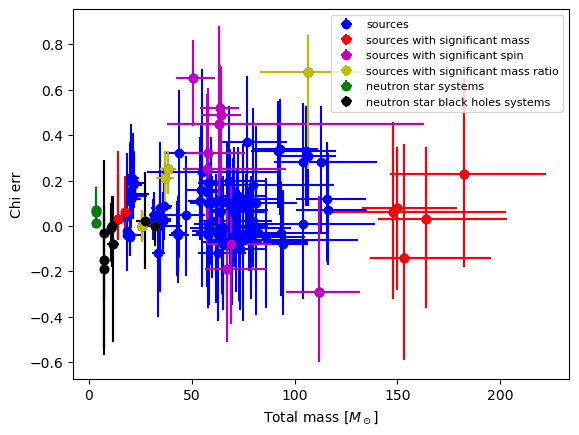

In [ ]:
graph("total_mass", "chi_eff" , "total_mass_lw" , "total_mass_up" , "chi_eff_lw" , "chi_eff_up" )
plt.xlabel ('Total mass [$M_\odot$]')
plt.ylabel ('Chi err')

### Spin vs mass 1

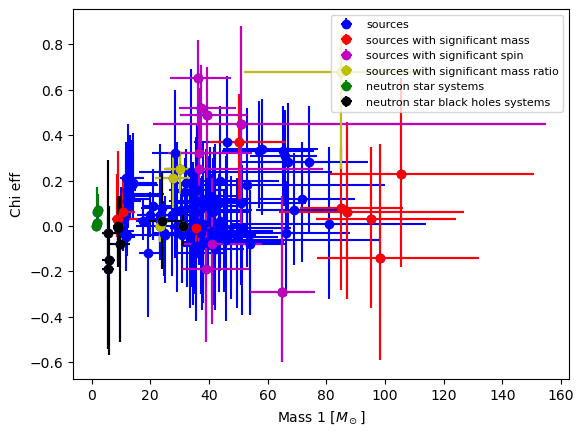

In [ ]:
graph("mass_1", "chi_eff" , "mass_1_lw" , "mass_1_up" , "chi_eff_lw" , "chi_eff_up" )
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('Chi eff')
plt.legend(loc="upper right", fontsize= 8)

### Spin vs distance

(0.0, 6000.0)

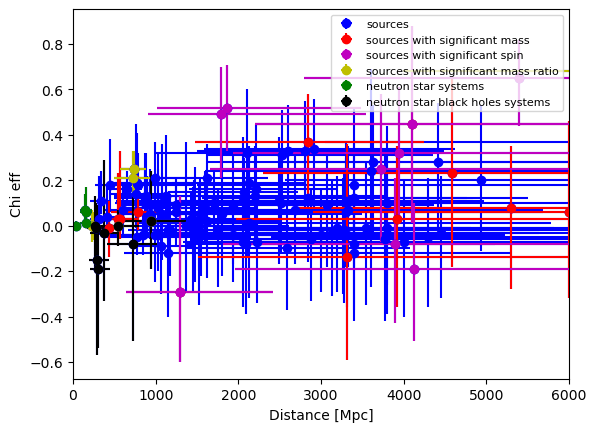

In [ ]:
graph("luminosity_distance", "chi_eff" , "luminosity_distance_lw" , "luminosity_distance_up" , "chi_eff_lw" , "chi_eff_up" )

plt.xlabel ('Distance [Mpc]')
plt.ylabel ('Chi eff')
plt.legend(loc="upper right", fontsize= 8)

plt.xlim([0,6000])

### Spin vs Chirp

Text(0, 0.5, 'chirp mass [$M_\\odot$]')

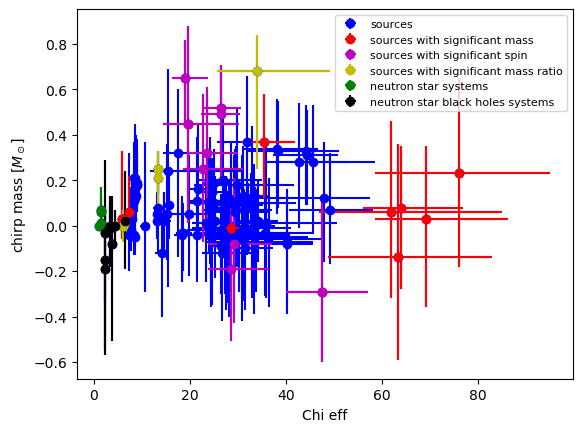

In [ ]:
graph("chirp_mass", "chi_eff" , "chirp_mass_lw" , "chirp_mass_up" , "chi_eff_lw" , "chi_eff_up" )

plt.xlabel ('Chi eff')
plt.ylabel ('chirp mass [$M_\odot$]')

### final mss vs total mass

c:\Users\sarev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
c:\Users\sarev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


Text(0, 0.5, 'Total mass [$M_\\odot$]')

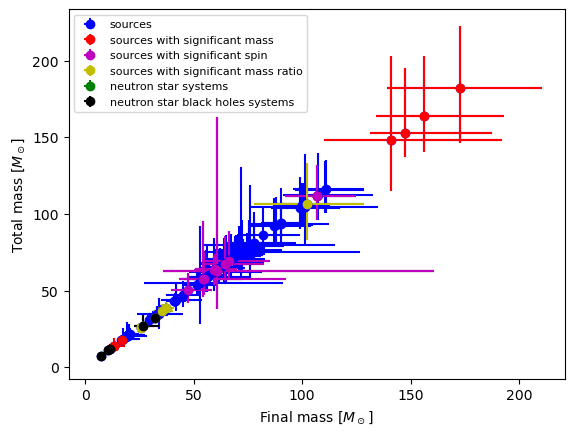

In [ ]:
graph("final_mass", "total_mass", "final_mass_lw", "final_mass_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('Final mass [$M_\odot$]')
plt.ylabel ('Total mass [$M_\odot$]')

### SNR vs tot mass

Text(0, 0.5, 'Total mass [$M_\\odot$]')

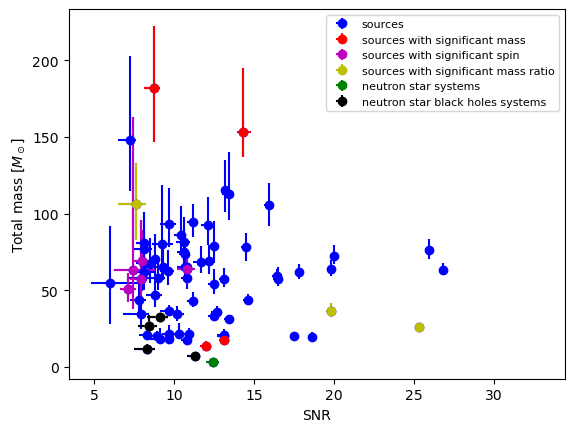

In [ ]:
graph("snr", "total_mass", "snr_lw", "snr_up", "total_mass_lw", "total_mass_up")


plt.xlabel ('SNR')
plt.ylabel ('Total mass [$M_\odot$]')

### SNR vs chirp

Text(0, 0.5, 'chirp mass [$M_\\odot$]')

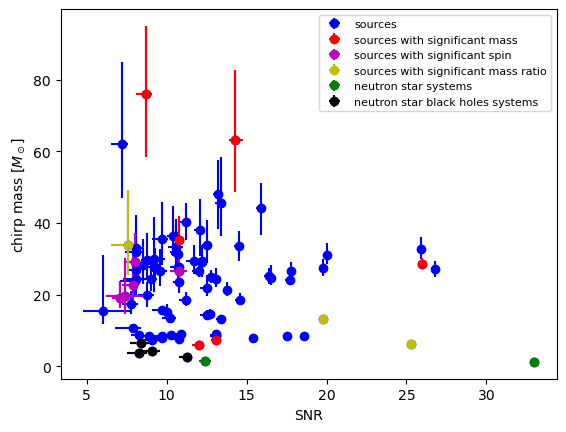

In [ ]:
graph("snr", "chirp_mass", "snr_lw", "snr_up", "chirp_mass_lw", "chirp_mass_up")
plt.xlabel ('SNR')
plt.ylabel ('chirp mass [$M_\odot$]')

### SNR vs distance

Text(0, 0.5, 'Distance')

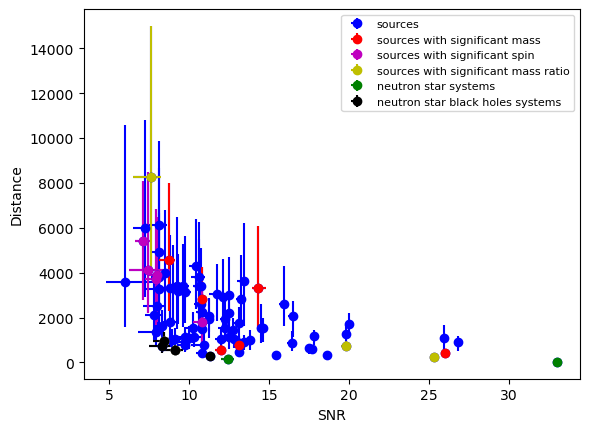

In [ ]:
graph("snr", "luminosity_distance", "snr_lw", "snr_up", "luminosity_distance_lw", "luminosity_distance_up")
plt.xlabel ('SNR')
plt.ylabel ('Distance')

### SNR vs spin

Text(0, 0.5, 'Chi eff')

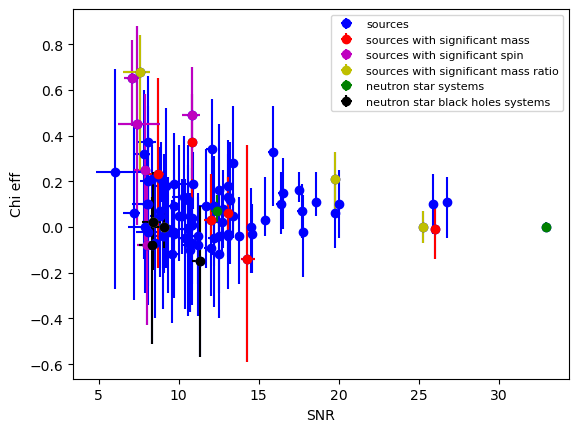

In [ ]:
graph("snr", "chi_eff", "snr_lw", "snr_up", "chi_eff_lw", "chi_eff_up")

plt.xlabel ('SNR')
plt.ylabel ('Chi eff')